<a href="https://colab.research.google.com/github/jiheeko/Seperation-of-waste-by-materials/blob/main/yoloV8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

!nvidia-smi


Mon Dec  4 05:53:40 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   67C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:

import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:

!Pip install method (recommended)

!pip install ultralytics==8.0.28

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.9/78.2 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

In [5]:

model = YOLO(f'{HOME}/yolov8s-seg.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)

100%|██████████| 22.8M/22.8M [00:00<00:00, 186MB/s]
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11810560 parameters, 0 gradients, 42.6 GFLOPs

100%|██████████| 104k/104k [00:00<00:00, 72.5MB/s]
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 1 backpack, 1 handbag, 79.4ms
Speed: 0.6ms pre-process, 79.4ms inference, 34.7ms postprocess per image at shape (1, 3, 640, 640)


In [6]:
results[0].boxes.xyxy

tensor([[4.00000e+00, 3.04000e+02, 6.43000e+02, 1.27600e+03],
        [6.28000e+02, 7.35000e+02, 6.98000e+02, 7.88000e+02],
        [3.50000e+01, 2.50000e+02, 6.49000e+02, 1.27600e+03],
        [3.31000e+02, 6.44000e+02, 5.38000e+02, 1.25400e+03],
        [1.00000e+00, 6.60000e+02, 4.44000e+02, 1.27800e+03]], device='cuda:0')

In [9]:
results[0].boxes.conf

tensor([0.64894, 0.52386, 0.37839, 0.34418, 0.26679], device='cuda:0')

In [7]:
results[0].boxes.cls

tensor([ 0.,  2., 16., 26., 24.], device='cuda:0')

In [8]:
results[0].masks.masks

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 

In [10]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="9GioxqxzCYuJPY1ofooi")
project = rf.workspace("team-project-ani7l").project("seperation-of-waste-by-materials")
dataset = project.version(10).download("yolov8")

/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.5/68.5 kB 860.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.2/72.2 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.7 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      S

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.28, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Seperation-of-waste-by-materials-10 in yolov8:: 100%|██████████| 1356/1356 [00:00<00:00, 4764.78it/s]


In [27]:
!ls {dataset.location}/data.yaml

/content/datasets/Seperation-of-waste-by-materials-10/data.yaml


In [11]:
%cd {HOME}

!yolo task=segment mode=train model=yolov8s-seg.pt data={dataset.location}/data.yaml epochs=50 imgsz=640

/content
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=/content/datasets/Seperation-of-waste-by-materials-10/data.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False

In [13]:
# 클래스별 Precision, Recall 값
precision = {'glass': 0.527, 'paper': 0.914, 'plastic': 0.151, 'steel': 0.118, 'trash': 0.414, 'vinyl': 0.423}
recall = {'glass': 0.49, 'paper': 0.679, 'plastic': 0.625, 'steel': 0.176, 'trash': 0.333, 'vinyl': 1}

# 전체 Precision, Recall 값
all_precision = 0.424
all_recall = 0.551

# IoU 계산 함수
def calculate_iou(precision, recall):
    return 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0.0

# 클래스별 IoU 계산
iou_dict = {}
for class_name in precision.keys():
    iou = calculate_iou(precision[class_name], recall[class_name])
    iou_dict[class_name] = iou

# 전체 IoU 계산
all_iou = calculate_iou(all_precision, all_recall)

# 결과 출력
for class_name, iou in iou_dict.items():
    print(f"IoU for {class_name}: {iou}")

print(f"IoU for all: {all_iou}")
print('-'*10)

# 클래스별 정확도 계산
accuracy_dict = {}
for class_name in precision.keys():
    accuracy = (2 * (precision[class_name] * recall[class_name])) / (precision[class_name] + recall[class_name]) if (precision[class_name] + recall[class_name]) > 0 else 0.0
    accuracy_dict[class_name] = accuracy

# 전체 정확도 계산
all_accuracy = (2 * (all_precision * all_recall)) / (all_precision + all_recall) if (all_precision + all_recall) > 0 else 0.0

# 결과 출력
for class_name, accuracy in accuracy_dict.items():
    print(f"Accuracy for {class_name}: {accuracy}")

print(f"Accuracy for all: {all_accuracy}")





IoU for glass: 0.5078269419862341
IoU for paper: 0.7791663527934716
IoU for plastic: 0.24323453608247422
IoU for steel: 0.14127891156462585
IoU for trash: 0.3691084337349398
IoU for vinyl: 0.5945186226282502
IoU for all: 0.47922871794871796
----------
Accuracy for glass: 0.5078269419862341
Accuracy for paper: 0.7791663527934716
Accuracy for plastic: 0.24323453608247422
Accuracy for steel: 0.14127891156462585
Accuracy for trash: 0.3691084337349398
Accuracy for vinyl: 0.5945186226282502
Accuracy for all: 0.47922871794871796


In [14]:
!ls {HOME}/runs/segment/train/


args.yaml					   MaskPR_curve.png	train_batch2.jpg
BoxF1_curve.png					   MaskR_curve.png	val_batch0_labels.jpg
BoxP_curve.png					   results.csv		val_batch0_pred.jpg
BoxPR_curve.png					   results.png		val_batch1_labels.jpg
BoxR_curve.png					   train_batch0.jpg	val_batch1_pred.jpg
confusion_matrix.png				   train_batch1200.jpg	val_batch2_labels.jpg
events.out.tfevents.1701669318.e38fe5769d82.741.0  train_batch1201.jpg	val_batch2_pred.jpg
MaskF1_curve.png				   train_batch1202.jpg	weights
MaskP_curve.png					   train_batch1.jpg


/content


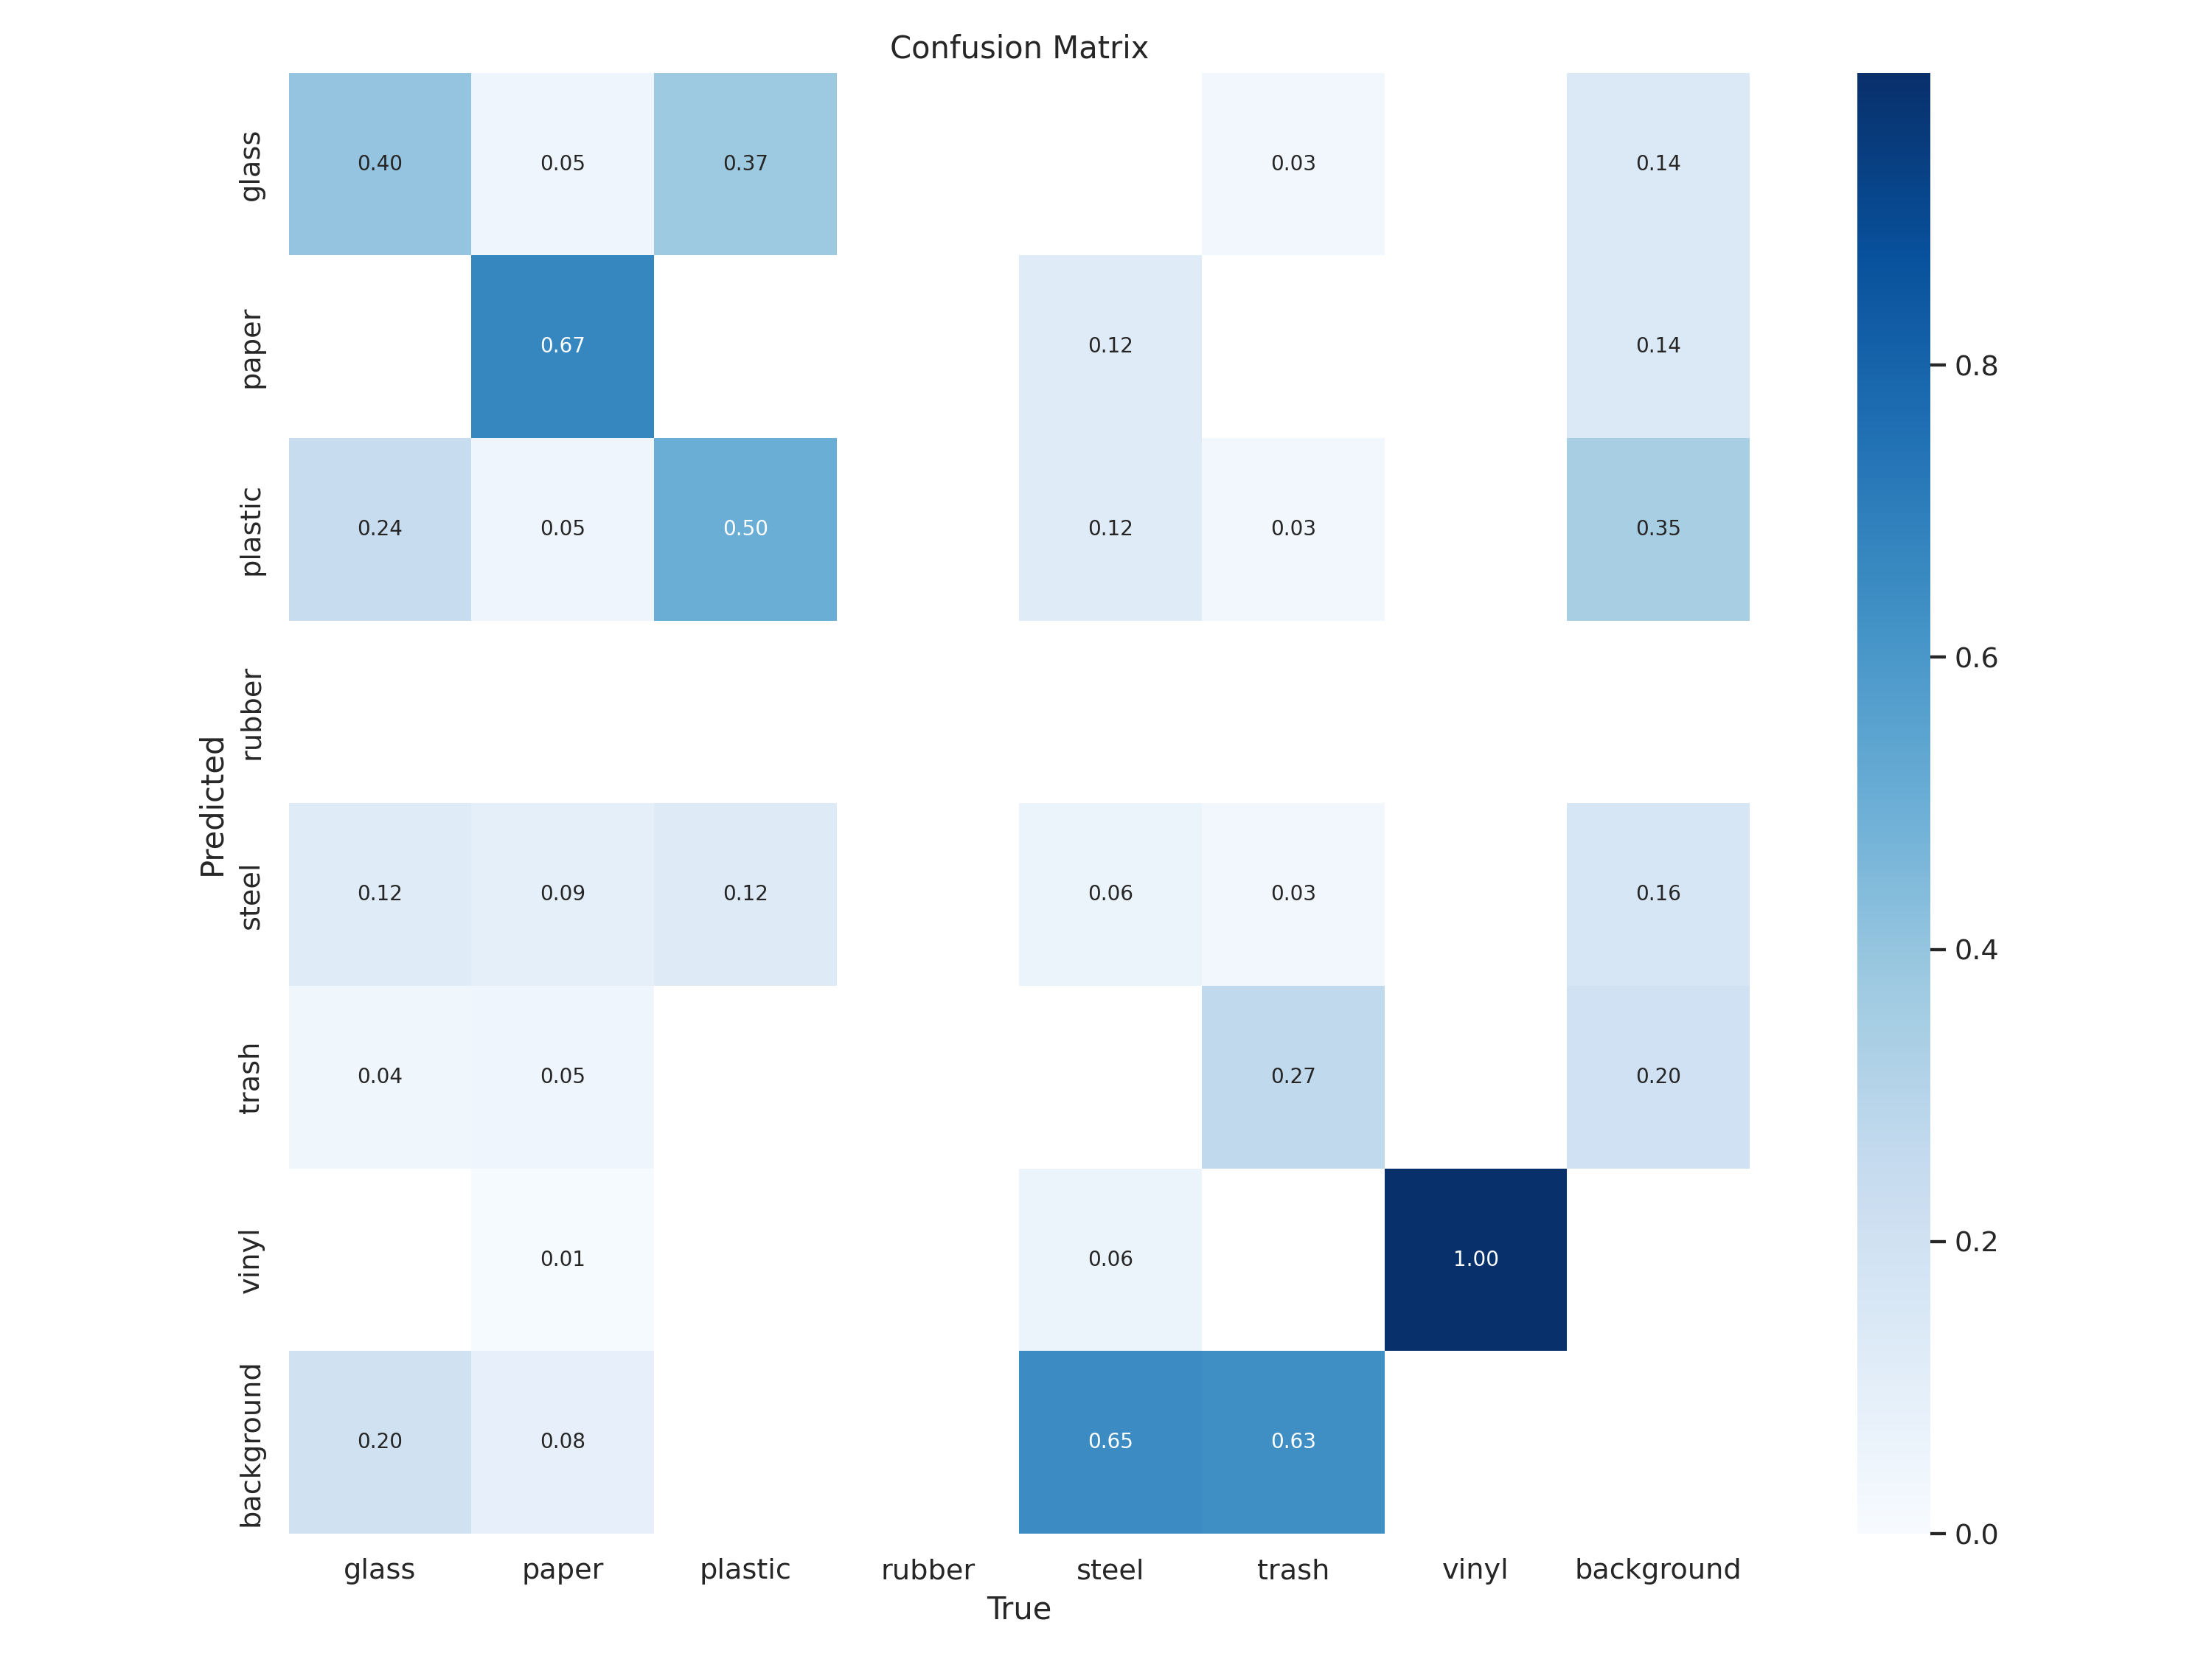

In [15]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/confusion_matrix.png', width=600)

/content


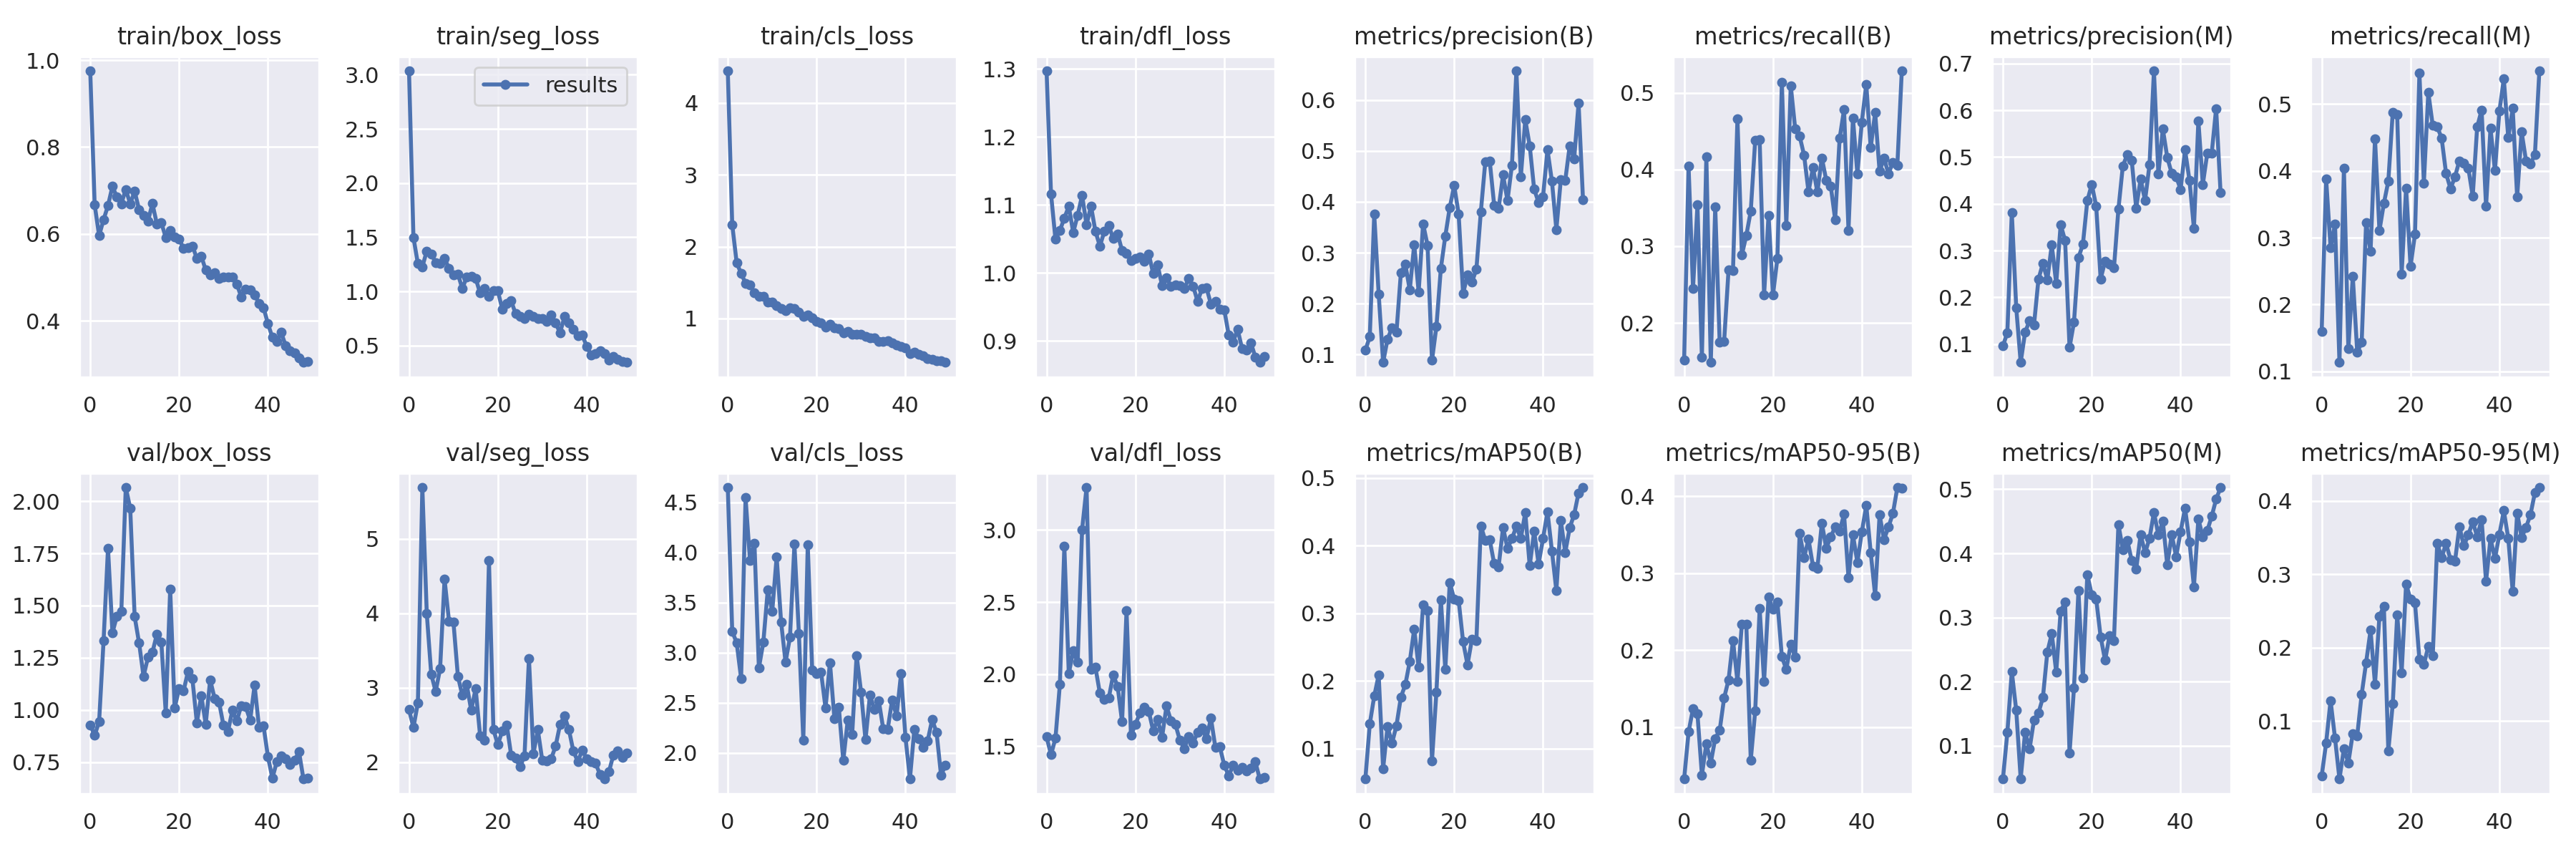

In [16]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/results.png', width=600)

/content


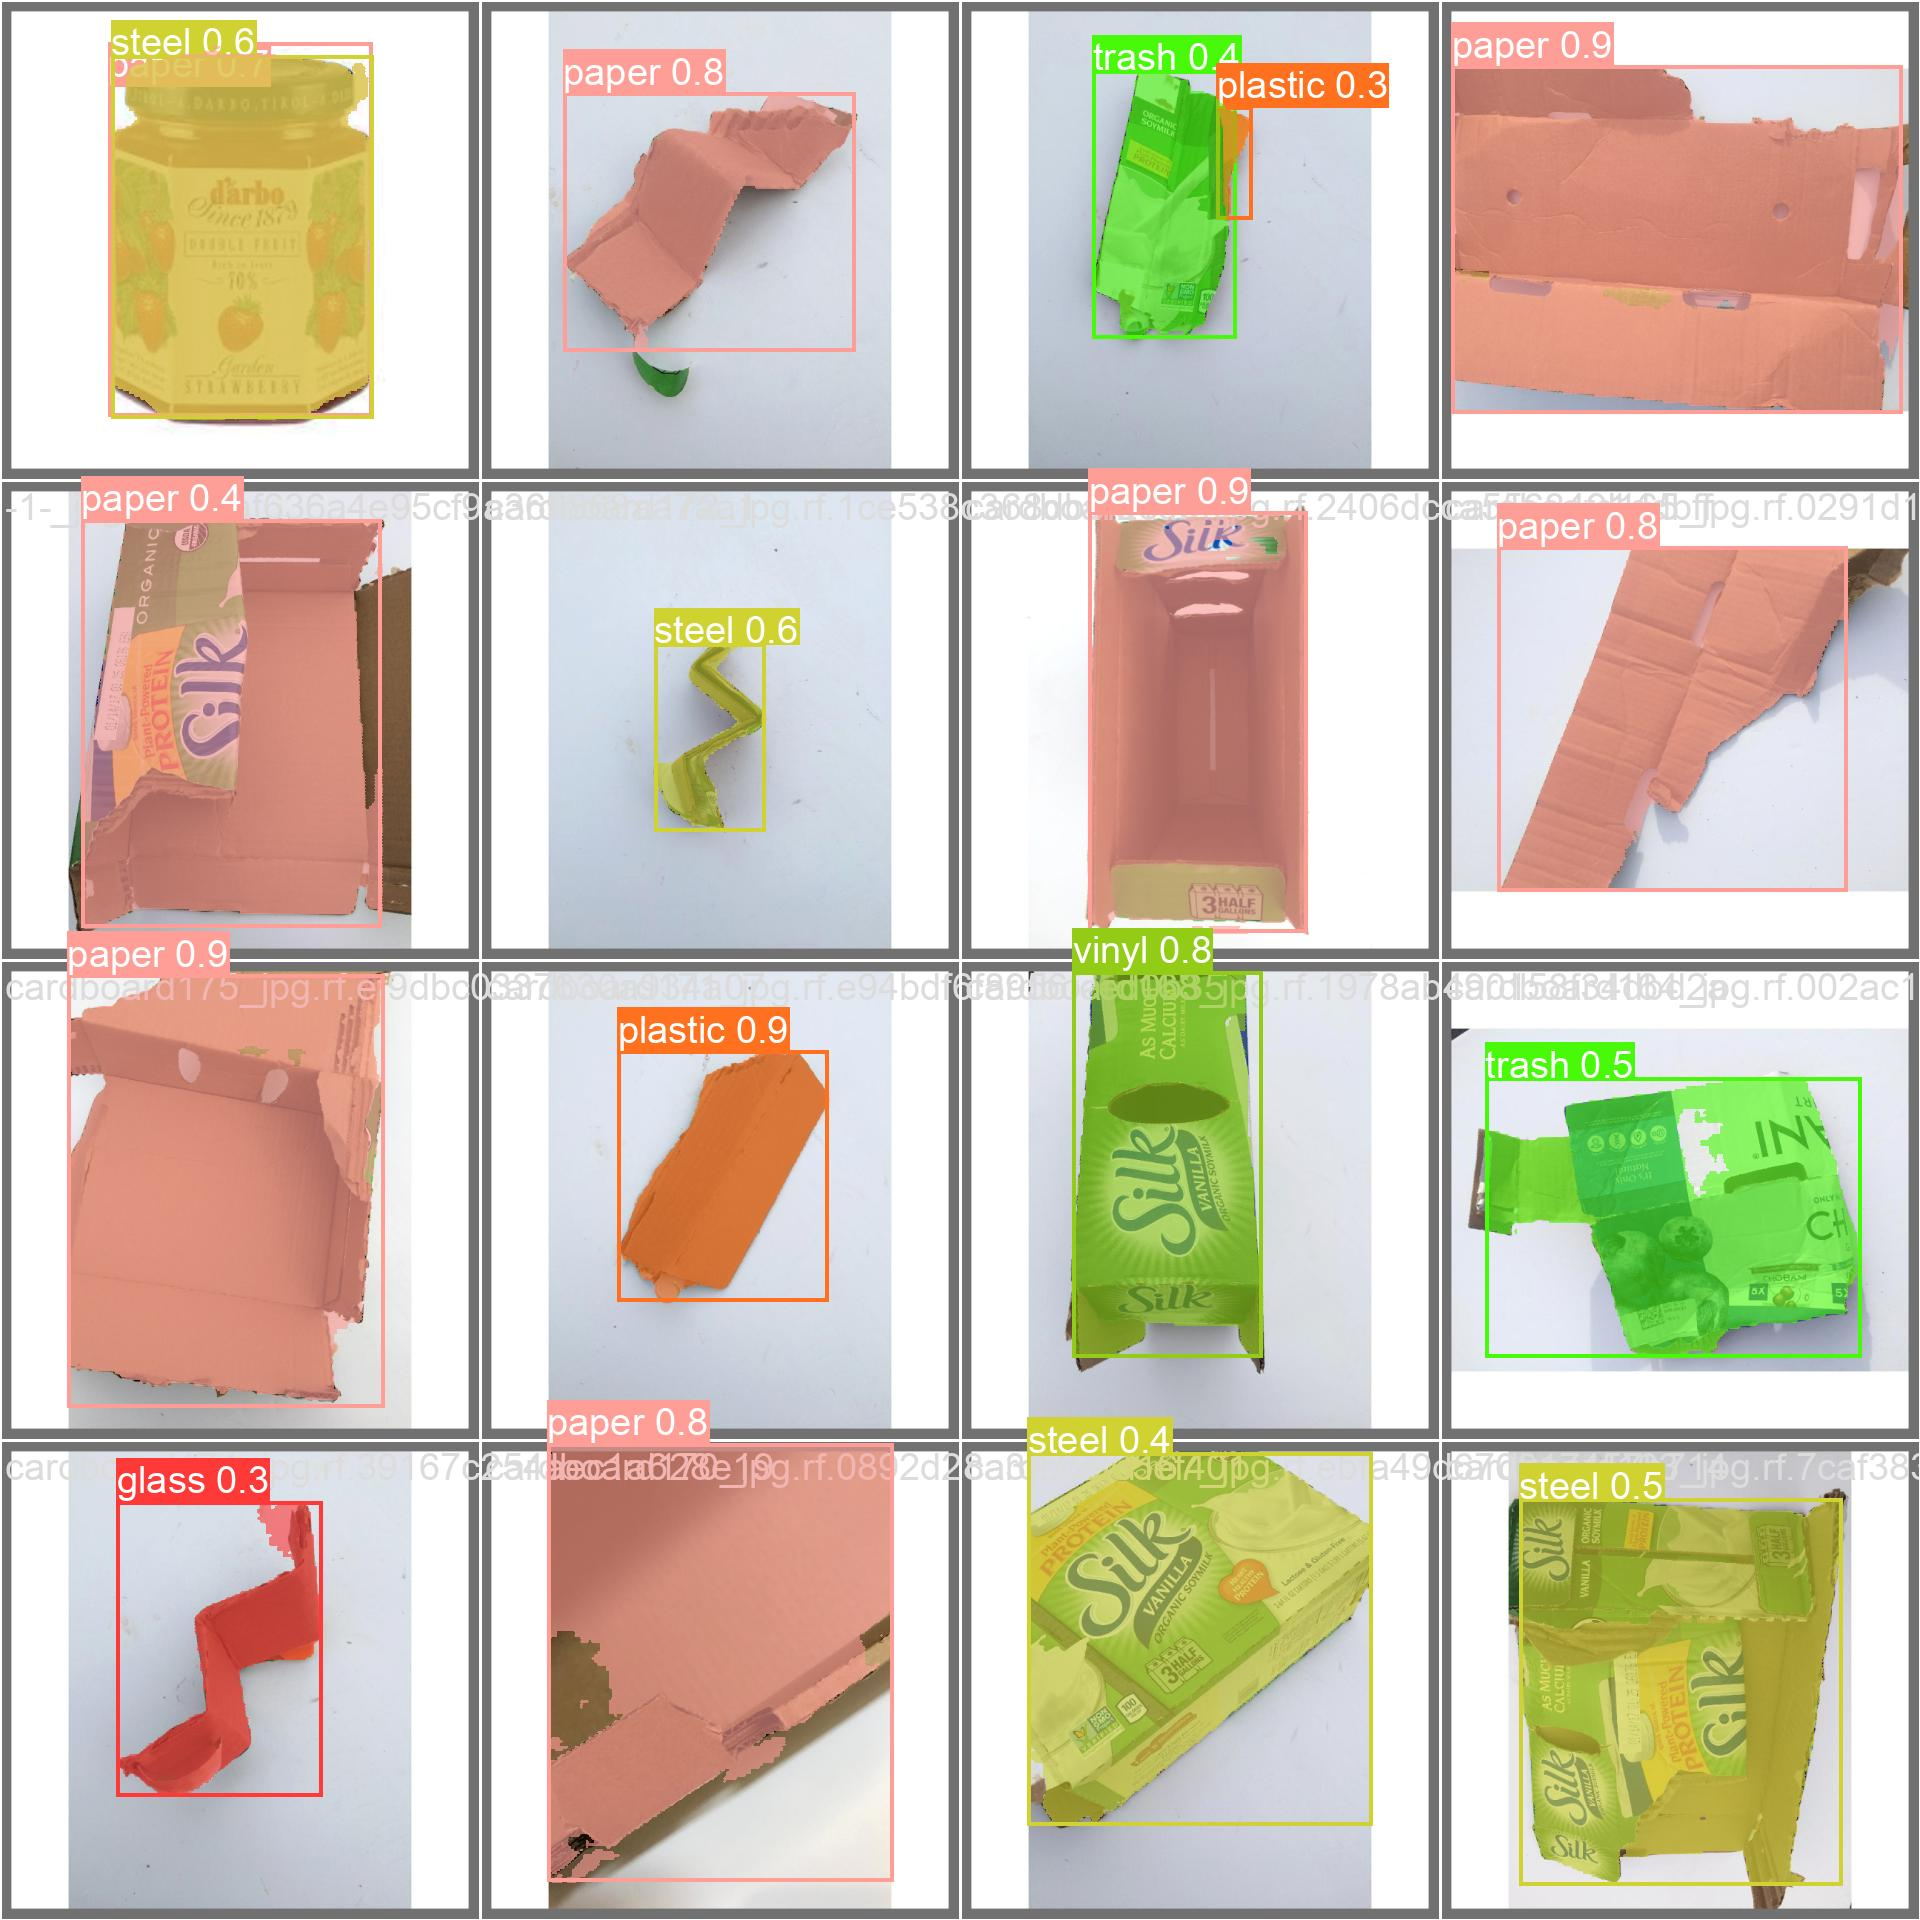

In [17]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/val_batch0_pred.jpg', width=600)

Validate


In [18]:

%cd {HOME}

!yolo task=segment mode=val model={HOME}/runs/segment/train/weights/best.pt data={dataset.location}/data.yaml

/content
2023-12-04 06:31:26.140591: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-04 06:31:26.140642: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-04 06:31:26.140679: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-04 06:31:27.366859: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11782309 parameters, 0 gradients, 42.5 GFLOPs
val: Scanning /content/datasets/Seperation-of-waste-by-

In [19]:
# 클래스별 Precision, Recall 값
precision = {'glass': 0.523, 'paper': 0.915, 'plastic': 0.15, 'steel': 0.118, 'trash': 0.414, 'vinyl': 0.423}
recall = {'glass': 0.48, 'paper': 0.679, 'plastic': 0.625, 'steel': 0.176, 'trash': 0.333, 'vinyl': 1}

# 전체 Precision, Recall 값
all_precision = 0.424
all_recall = 0.549

# IoU 계산 함수
def calculate_iou(precision, recall):
    return 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0.0

# 클래스별 IoU 계산
iou_dict = {}
for class_name in precision.keys():
    iou = calculate_iou(precision[class_name], recall[class_name])
    iou_dict[class_name] = iou

# 전체 IoU 계산
all_iou = calculate_iou(all_precision, all_recall)

# 결과 출력
for class_name, iou in iou_dict.items():
    print(f"IoU for {class_name}: {iou}")

print(f"IoU for all: {all_iou}")
print('-'*10)

# 클래스별 정확도 계산
accuracy_dict = {}
for class_name in precision.keys():
    accuracy = (2 * (precision[class_name] * recall[class_name])) / (precision[class_name] + recall[class_name]) if (precision[class_name] + recall[class_name]) > 0 else 0.0
    accuracy_dict[class_name] = accuracy

# 전체 정확도 계산
all_accuracy = (2 * (all_precision * all_recall)) / (all_precision + all_recall) if (all_precision + all_recall) > 0 else 0.0

# 결과 출력
for class_name, accuracy in accuracy_dict.items():
    print(f"Accuracy for {class_name}: {accuracy}")

print(f"Accuracy for all: {all_accuracy}")





IoU for glass: 0.5005782652043868
IoU for paper: 0.7795294855708909
IoU for plastic: 0.24193548387096772
IoU for steel: 0.14127891156462585
IoU for trash: 0.3691084337349398
IoU for vinyl: 0.5945186226282502
IoU for all: 0.4784707091469681
----------
Accuracy for glass: 0.5005782652043868
Accuracy for paper: 0.7795294855708909
Accuracy for plastic: 0.24193548387096772
Accuracy for steel: 0.14127891156462585
Accuracy for trash: 0.3691084337349398
Accuracy for vinyl: 0.5945186226282502
Accuracy for all: 0.4784707091469681


Test

In [20]:

%cd {HOME}
!yolo task=segment mode=predict model={HOME}/runs/segment/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=true


/content
2023-12-04 06:33:07.151936: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-04 06:33:07.151991: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-04 06:33:07.152029: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-04 06:33:08.625613: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11782309 parameters, 0 gradients, 42.5 GFLOPs

image 1/64 /content/datasets/Seperation-of-waste-by-ma

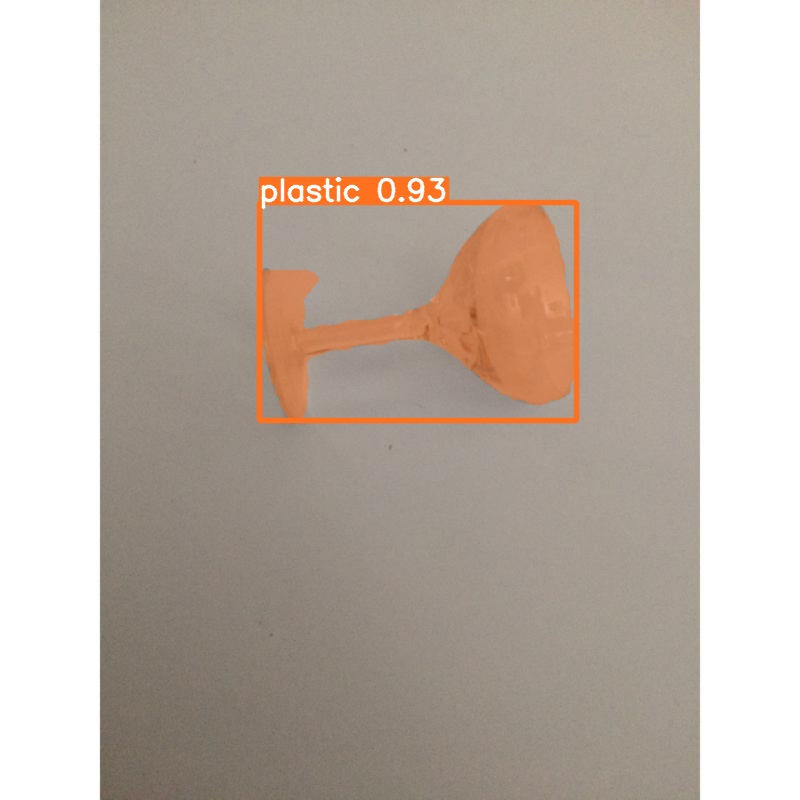

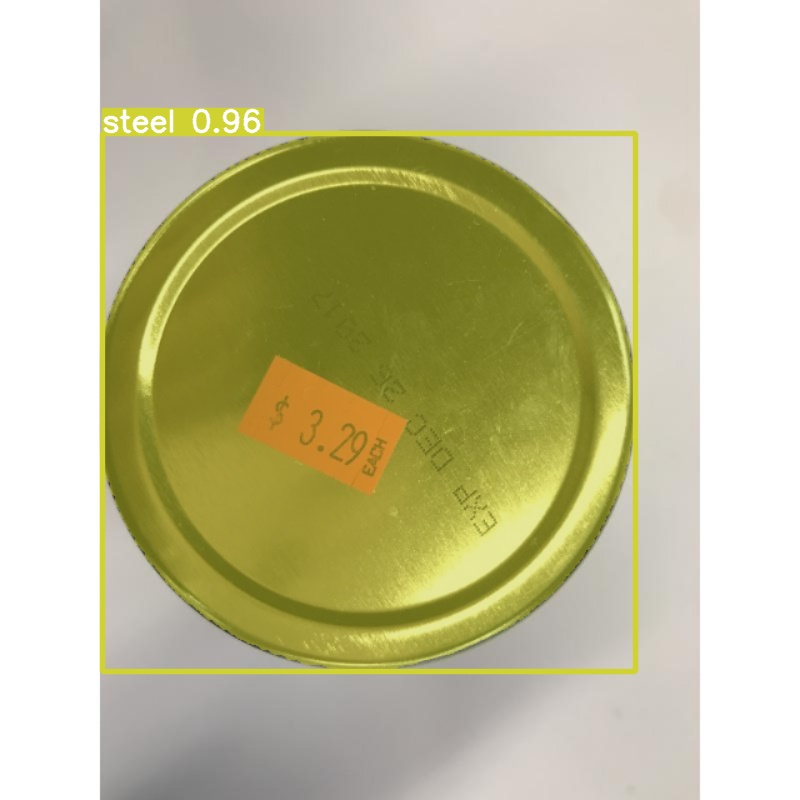

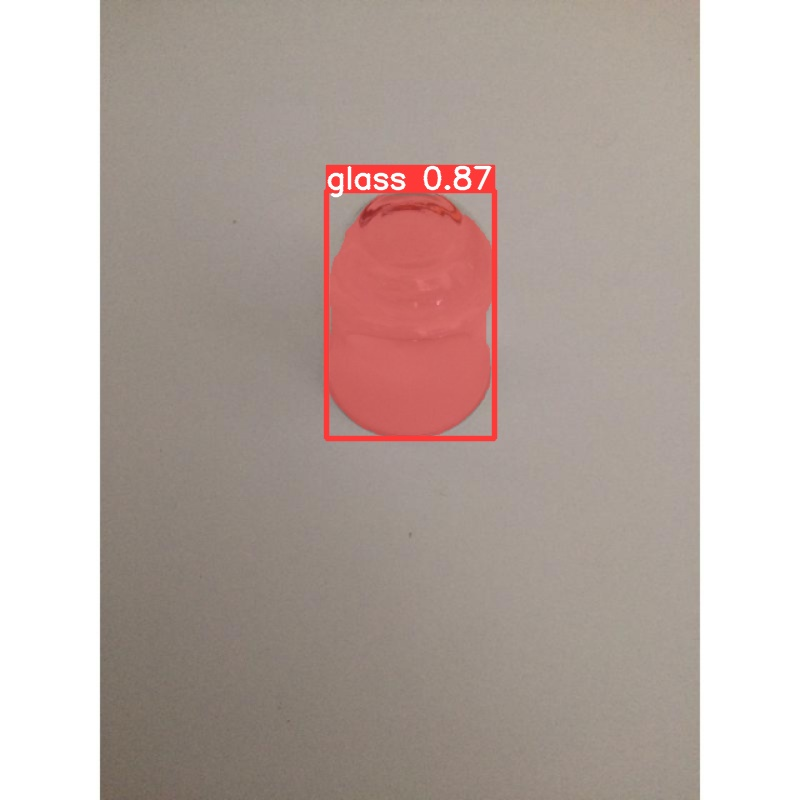

In [21]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/segment/predict/*.jpg')[:3]:
      display(Image(filename=image_path, height=600))
      print("\n")

In [37]:
from PIL import Image
import numpy as np
import os

def calculate_iou(gt_mask, pred_mask):
    intersection = np.logical_and(gt_mask, pred_mask)
    union = np.logical_or(gt_mask, pred_mask)
    iou = np.sum(intersection) / (np.sum(union) + 1e-10)  # 분모에 작은 값 추가
    return iou


def calculate_accuracy(gt_mask, pred_mask):
    accuracy = np.sum(gt_mask == pred_mask) / (np.prod(gt_mask.shape) + 1e-10)  # 분모에 작은 값 추가
    return accuracy


def load_mask(image_path):
    # Assuming the mask is stored as a binary image (black and white)
    mask = np.array(Image.open(image_path).convert("L"), dtype=np.bool)
    return mask

def main():
    dataset_location = "{dataset.location}/test/images"  # 실제 데이터셋 디렉토리 경로로 변경하세요.
    predictions_location = "{HOME}/runs/segment/predict"

    iou_list = []
    accuracy_list = []



    mean_iou = np.mean(iou_list)
    mean_accuracy = np.mean(accuracy_list)

    print(f"Mean IoU: {mean_iou}, Mean Accuracy: {mean_accuracy}")

if __name__ == "__main__":
    main()


Mean IoU: nan, Mean Accuracy: nan


Mean of empty slice.
invalid value encountered in double_scalars
